In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [11]:
class Main:
    def __init__(self, Path):
        self.Path = Path
    
    def Read_Image(self):
        self.Image_List = cv2.imread(self.Path, cv2.IMREAD_GRAYSCALE)
        self.Show_Image(self.Image_List, "Original Image")
    
    def Histogram_Equalization(self):
        self.Nk = np.zeros(256, dtype = int)
        for Row in range(self.Image_List.shape[0]):
            for Column in range(self.Image_List.shape[1]):
                self.Nk[self.Image_List[Row, Column]] += 1

        self.Total = 0
        self.CDF = []
        for i in self.Nk:
            self.Total += i
            self.CDF.append(self.Total)
        
        self.CDF_Normalized = [0] * 256
        self.CDF_Normalized[0] = self.CDF[0]
        for i in range(1, 256):
            self.CDF_Normalized[i] = (self.CDF[i] * 255) // self.Total

        self.Equalized_Image = [[0] * len(row) for row in self.Image_List]
        for i in range(len(self.Image_List)):
            for j in range(len(self.Image_List[i])):
                self.Equalized_Image[i][j] = self.CDF_Normalized[self.Image_List[i][j]]
                
        self.Equalized_Image = np.uint8(self.Equalized_Image)
        
        self.Show_Image(self.Equalized_Image, "Equalized Image")
        return self.Equalized_Image,

    def Show_Image(self, Image, Text):
        plt.title(Text)
        plt.imshow(Image, cmap='gray')
        plt.axis('off')
        plt.show()

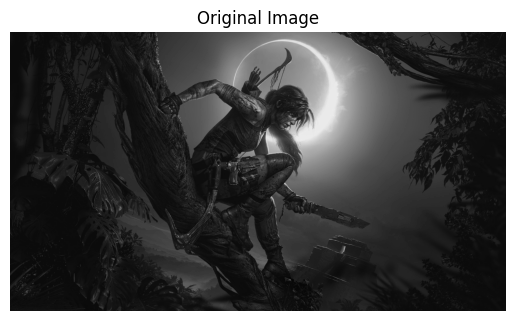

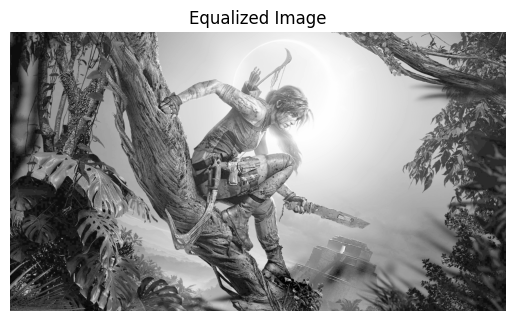

(array([[106, 106, 106, ...,  65,  55,  43],
        [106, 106, 101, ...,   3,  28,  73],
        [106, 101, 101, ...,  28,   3,  28],
        ...,
        [ 86,  91,  91, ...,  43,  43,  43],
        [ 80,  86,  86, ...,  43,  43,  43],
        [ 65,  65,  65, ...,  43,  43,  43]], dtype=uint8),)

In [12]:
Path = 'rt.jpg'
Main = Main(Path)
Main.Read_Image()
Main.Histogram_Equalization()